In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV
from utils import *

In [2]:
train = pd.read_csv('train_dataset.csv')
test = pd.read_csv('test_dataset.csv')

In [3]:
sample = pd.read_csv('sample_submission.csv')

In [4]:
param = {'min_samples_split': [2, 10, 20]}

In [5]:
gbc = GradientBoostingClassifier(n_estimators=100)

In [6]:
%time gbc.fit(train.loc[:, 'event_type 1':], train.loc[:, 'fault_severity'])

CPU times: user 1min 53s, sys: 6.72 s, total: 1min 59s
Wall time: 2min 15s


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [7]:
gs = GridSearchCV(gbc, param)

In [18]:
%time gs.fit(train.loc[:, 'event_type 1':], train.loc[:, 'fault_severity'])

CPU times: user 4min 50s, sys: 791 ms, total: 4min 51s
Wall time: 4min 51s


GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'min_samples_split': [2, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [19]:
gs.best_params_

{'min_samples_split': 10}

In [20]:
gbc = GradientBoostingClassifier(n_estimators=200, min_samples_split=10)
insample_scores = []
outsample_scores = []
insample_evaluates = []
outsample_evaluates = []
com_cats = []
for rid, com_range in enumerate(full_ranges[1:]):
    print(rid)
    col_ids = list_sum(x[1] for x in com_range)
    com_cat = string_sum(x[0] for x in com_range)
    errors = get_score_evaluate(
        train.iloc[:, col_ids].values,
        train.loc[:, 'fault_severity'].values,
        gbc,
        random_state=487)
    insample_scores.append(errors[0])
    outsample_scores.append(errors[1])
    insample_evaluates.append(errors[2])
    outsample_evaluates.append(errors[3])
    com_cats.append(com_cat)
res = pd.DataFrame(
    {'insample_scores': insample_scores, 
     'outsample_scores': outsample_scores,
     'insample_evaluates': insample_evaluates,
     'outsample_evaluates': outsample_evaluates}, index=com_cats)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


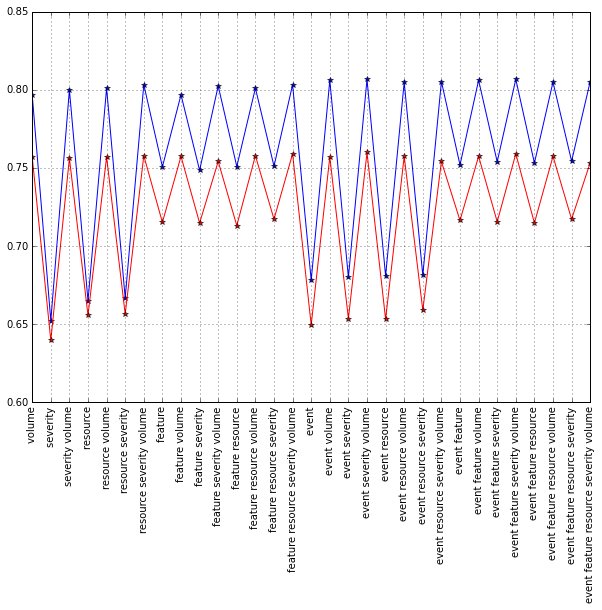

In [21]:
plt.figure(figsize=(10, 7))
ax = plt.subplot(111)
res.loc[:, 'insample_scores'].plot(kind='line', ax=ax, rot=90, marker='*')
res.loc[:, 'outsample_scores'].plot(kind='line', ax=ax, color='r', rot=90, marker='*')
plt.xticks(range(len(res.index)), res.index)
plt.grid()
plt.show()

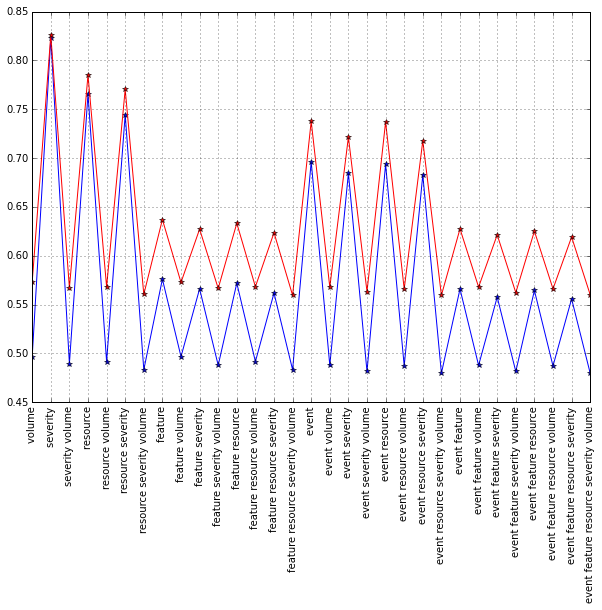

In [22]:
plt.figure(figsize=(10, 7))
ax = plt.subplot(111)
res.loc[:, 'insample_evaluates'].plot(kind='line', ax=ax, rot=90, marker='*')
res.loc[:, 'outsample_evaluates'].plot(kind='line', ax=ax, color='r', rot=90, marker='*')
plt.xticks(range(len(res.index)), res.index)
plt.grid()
plt.show()

In [8]:
gbc = GradientBoostingClassifier(n_estimators=200, min_samples_split=10)

In [9]:
gbc.fit(train.loc[:, 'event_type 1':], train.loc[:, 'fault_severity'])

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [10]:
prob = gbc.predict_proba(test.loc[:, 'event_type 1':])

In [11]:
gbc_prob = pd.DataFrame({
    'id': sample.loc[:, 'id'].values, 
    'predict_0': prob[:, 0],
    'predict_1': prob[:, 1],
    'predict_2': prob[:, 2]})

In [12]:
gbc_prob.to_csv('gbc.csv', index=False)